Dalam bagian ini akan dipelajari metode machine learning untuk permasalahan klasifikasi data. Disini akan dicoba melakukan klasifikasi data dengan menggunakan data Titanic dataset dengan beberapa model klasifikasi seperti :
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Machine Classifier
- KNeighborsClassifier



In [200]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [111]:
digits = load_digits()

In [112]:
df_digit = pd.DataFrame(digits["data"])
df_digit["target"] = digits["target"]

In [136]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_digit, df_digit["target"]):
    digit_train_set = df_digit.loc[train_index]
    digit_test_set = df_digit.loc[test_index]

### Binary Classifier

In [363]:
X_train = digit_train_set.drop("target", axis=1)
X_test = digit_test_set.drop("target", axis=1)

# noise = np.random.randint(0, 10, (len(X_train), 64))
# X_train = X_train + noise
# noise = np.random.randint(0, 10, (len(X_test), 64))
# X_test = X_test + noise

y_train = digit_train_set["target"]
y_test = digit_test_set["target"]

y_train_6 = y_train == 6
y_test_6 = y_test == 6

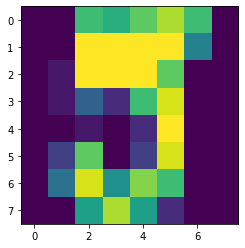

In [374]:
plt.imshow(X_train.iloc[0,:].values.reshape(8,8))

### SGD Classifier

In [289]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(max_iter=5, random_state=42)

In [290]:
y_pred = sgd_clf.predict(X_test)

In [292]:
accuracy = accuracy_score(y_test_6, y_pred)
accuracy

0.9944444444444445

In [293]:
cross_val_score(sgd_clf, X_test, y_test_6, cv=3, scoring="accuracy")

array([0.975     , 1.        , 0.95833333])

In [294]:
confusion_matrix(y_test_6, y_pred)

array([[323,   1],
       [  1,  35]], dtype=int64)

In [295]:
precision_score(y_test_6, y_pred)

0.9722222222222222

In [296]:
recall_score(y_test_6, y_pred)

0.9722222222222222

In [297]:
f1_score(y_test_6, y_pred)

0.9722222222222222

In [309]:
y_test[y_test==6]

1773    6
1063    6
360     6
412     6
1354    6
1382    6
680     6
598     6
492     6
1055    6
1762    6
1725    6
1673    6
989     6
223     6
713     6
1035    6
1345    6
1391    6
996     6
882     6
1222    6
468     6
921     6
95      6
734     6
1094    6
6       6
1252    6
321     6
362     6
290     6
453     6
1191    6
402     6
1321    6
Name: target, dtype: int32

In [310]:
some_digit = X_test.iloc[6,:]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([5831.83258839])

In [311]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [312]:
threshold = 10000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [318]:
y_scores = cross_val_predict(sgd_clf, X_test, y_test_6, cv=3,
                             method="decision_function")

In [315]:
len(y_scores)

360

In [317]:
len(y_test)

360

In [319]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_6, y_scores)

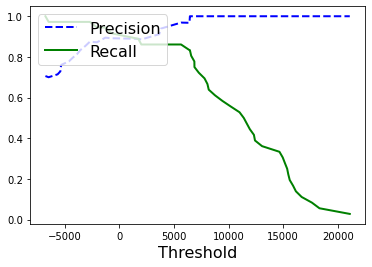

In [320]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
# plt.ylim([0, 1])

Text(0, 0.5, 'Precision')

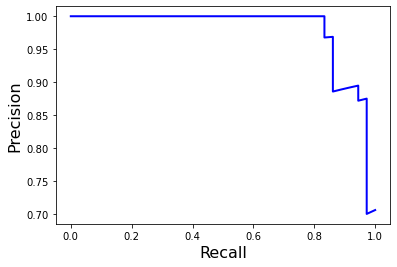

In [321]:
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)

In [322]:
from sklearn.metrics import roc_curve

In [323]:
fpr, tpr, thresholds = roc_curve(y_test_6, y_scores)

Text(0, 0.5, 'True Positive Rate')

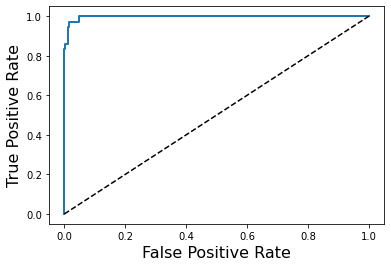

In [324]:
# ROC
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

In [241]:
from sklearn.metrics import roc_auc_score

In [325]:
roc_auc_score(y_test_6, y_scores)

0.9971707818930041

### Logistic Regression Classifier

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [327]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_6)

LogisticRegression()

In [328]:
y_proba = log_reg.predict_proba(X_test)

In [329]:
y_pred = log_reg.predict(X_test)

In [331]:
accuracy = accuracy_score(y_test_6, y_pred)
accuracy

0.9972222222222222

In [332]:
cross_val_score(log_reg, X_train, y_train_6, cv=5, scoring="accuracy")

array([0.99652778, 0.99652778, 0.99651568, 0.98954704, 0.99651568])

In [333]:
confusion_matrix(y_test_6, y_pred)

array([[324,   0],
       [  1,  35]], dtype=int64)

In [334]:
precision_score(y_test_6, y_pred)

1.0

In [335]:
recall_score(y_test_6, y_pred)

0.9722222222222222

In [336]:
f1_score(y_test_6, y_pred)

0.9859154929577464

### Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [337]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train_6)

RandomForestClassifier()

In [74]:
y_proba = forest.predict_proba(X_test)

In [75]:
y_pred = log_reg.predict(X_test)

In [338]:
accuracy = accuracy_score(y_test_6, y_pred)
accuracy

0.9972222222222222

In [339]:
confusion_matrix(y_test_6, y_pred)

array([[324,   0],
       [  1,  35]], dtype=int64)

In [340]:
len(y_test_6)

360

### Multiclass Classification

In [382]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42)

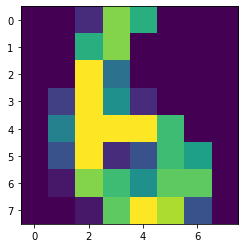

In [384]:
plt.imshow(some_digit.values.reshape(8,8))

In [385]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -6984.25225471,  -9515.37660801,  -9696.25106949,
         -6121.16663939,  -7775.48118227,  -6708.16792433,
          4529.08029209, -14284.29066039,  -4377.69719158,
        -14883.13046638]])

In [386]:
np.argmax(some_digit_scores)

6

In [387]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [390]:
y_pred = sgd_clf.predict(X_test)

In [391]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[35,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  1,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  5,  1,  1,  0,  0,  0,  2, 26,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  3,  1, 30]], dtype=int64)

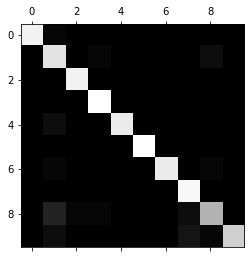

In [392]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [393]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

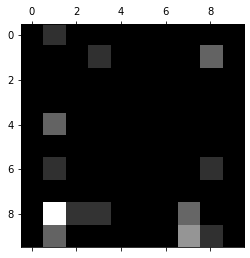

In [394]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

### Support Vector Machine Classifier

In [398]:
from sklearn.svm import SVC

In [402]:
# SVM Classifier model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [405]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.82508902,  0.74295292,  1.74393246,  4.77271831,  5.96905619,
         8.22946748,  9.30987903, -0.29225513,  7.27552344,  2.7491837 ]])

In [404]:
y_pred = sgd_clf.predict(X_test)

In [406]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[35,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  1,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  5,  1,  1,  0,  0,  0,  2, 26,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  3,  1, 30]], dtype=int64)

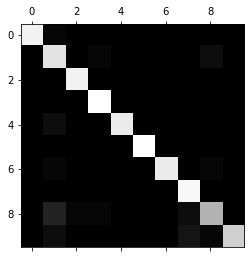

In [407]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [408]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

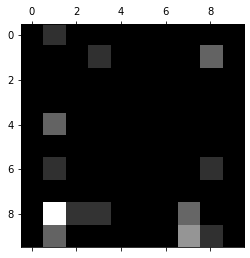

In [409]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [410]:
from sklearn.model_selection import GridSearchCV

In [411]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [412]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.101 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.101 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.202 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.202 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.202 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.101 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.101 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.101 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.101 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.889 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [415]:
y_pred = grid.predict(X_test)

In [416]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 35]], dtype=int64)

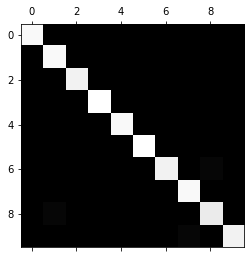

In [417]:
plt.matshow(conf_mx, cmap=plt.cm.gray)